In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santander-customer-transaction-prediction/sample_submission.csv
/kaggle/input/santander-customer-transaction-prediction/train.csv
/kaggle/input/santander-customer-transaction-prediction/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/train.csv')
test_df = pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/test.csv')

In [3]:
print(train_df.shape)
train_df.head()

(200000, 202)


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


## Baseline, no DataWrangling

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = train_df.iloc[:, 2:]
y = train_df['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

In [5]:
# dtree = DecisionTreeClassifier(max_depth=5, random_state=32)
# dtree.fit(X_train, y_train)

# rf = RandomForestClassifier(32, random_state=32)
# rf.fit(X_train, y_train)

# tree_score = dtree.score(X_val, y_val)
# forest_score = rf.score(X_val, y_val)

# print(f'DecisionTree: {tree_score}')
# print(f'RandomForest: {forest_score} ')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [7]:
# Data overview

train_shape = train_df.shape
n_train_samples = train_shape[0]
n_train_columns = train_shape[1]
train_dtypes = train_df.dtypes.value_counts()

test_shape = test_df.shape
n_test_samples = test_shape[0]
n_test_columns = test_shape[1]
test_dtypes = test_df.dtypes.value_counts()

print(f"Train dataset size: {n_train_samples}")
print(f"Train dataset number of columns: {n_train_columns}")
print(f"Train dataset column types:\n{train_dtypes}")
print(f"Train dataset size: {n_test_samples}")
print(f"Train dataset number of columns: {n_test_columns}")
print(f"Train dataset column types:\n{test_dtypes}")

Train dataset size: 200000
Train dataset number of columns: 202
Train dataset column types:
float64    200
object       1
int64        1
Name: count, dtype: int64
Train dataset size: 200000
Train dataset number of columns: 201
Train dataset column types:
float64    200
object       1
Name: count, dtype: int64


In [8]:
# Check missing values
print(f"Train set missing values: {train_df.isna().sum().sum()}")
print(f"Test set missing values: {test_df.isna().sum().sum()}")

Train set missing values: 0
Test set missing values: 0


Percent of data labeled as 0: 89.95
Percent of data labeled as 1: 10.05
Negative class: 179902 samples
Positive class: 20098 samples


<Axes: ylabel='count'>

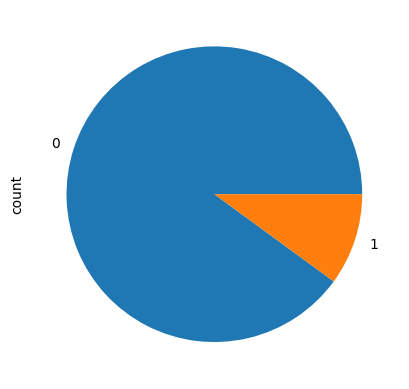

In [9]:
# check classes distribution
counts = train_df['target'].value_counts()
neg, pos = counts
print(f"Percent of data labeled as 0: {100* (neg / n_train_samples):.2f}")
print(f"Percent of data labeled as 1: {100* (pos / n_train_samples):.2f}")
print(f'Negative class: {neg} samples')
print(f'Positive class: {pos} samples')

counts.plot.pie()

#### Corelations

In [10]:
train_corr = train_df.select_dtypes(['float64', 'int64']).corr()
test_corr = test_df.select_dtypes(['float64']).corr()

In [11]:
train_corr_ = train_corr.abs().unstack().sort_values(ascending=False).reset_index()
train_corr_.rename(columns={'level_0': 'feature1', 'level1': 'feature2',0:'Corelation'},inplace=True)
train_corr_.drop(train_corr_.iloc[1::2].index, inplace=True)
train_corr_ = train_corr_.drop(train_corr_[train_corr_['Corelation'] == 1.0].index)

test_corr_ = test_corr.abs().unstack().sort_values(ascending=False).reset_index()
test_corr_.rename(columns={'level_0': 'feature1', 'level1': 'feature2',0:'Corelation'},inplace=True)
test_corr_.drop(test_corr_.iloc[1::2].index, inplace=True)
test_corr_ = test_corr_.drop(test_corr_[test_corr_['Corelation'] == 1.0].index)

In [12]:
#top highest corelations
train_corr_.head()

,feature1,level_1,Corelation
202,var_81,target,0.080917
204,var_139,target,0.074080
206,var_12,target,0.069489
208,var_6,target,0.066731
210,var_110,target,0.064275


In [13]:
# Unique values
train_unique = train_df.nunique().sort_values()
test_unique = test_df.nunique().sort_values()

In [14]:
train_unique_median = train_unique.median()
top_smallest_train = train_unique.iloc[1:]

test_unique_median = test_unique.median()
top_smallest_test = test_unique.iloc[1:]

print(f"Median of the unique values(Train): {train_unique_median}")
print(f"Min unique value(Train): {top_smallest_train.min()}")
print(f"Max unique value(Train): {top_smallest_train.max()}")

print(f"Median of the unique values(Test): {test_unique_median}")
print(f"Min unique value(Test): {top_smallest_test.min()}")
print(f"Max unique value(Test): {top_smallest_test.max()}")

Median of the unique values(Train): 108872.5
Min unique value(Train): 451
Max unique value(Train): 200000
Median of the unique values(Test): 71661.0
Min unique value(Test): 7569
Max unique value(Test): 200000


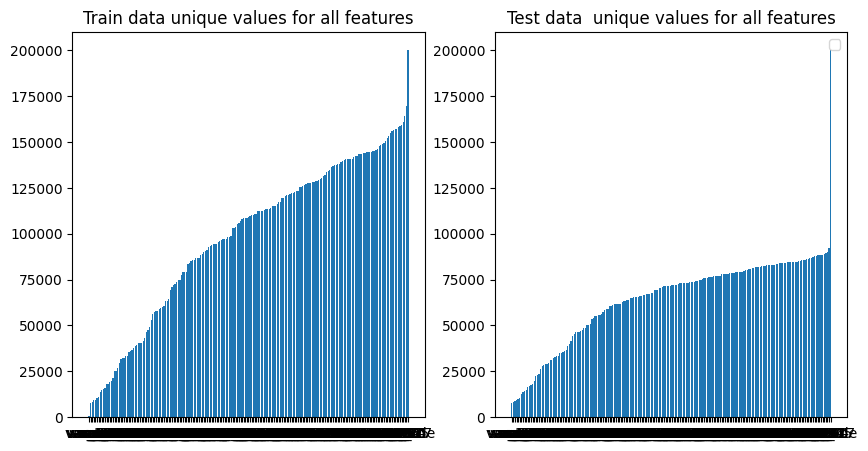

In [15]:
#Plot all the values to see the shape of the distribution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].bar(top_smallest_train.index, top_smallest_train.values)
axes[0].set_title('Train data unique values for all features')
axes[1].bar(top_smallest_test.index, top_smallest_test.values)
axes[1].set_title('Test data  unique values for all features')
plt.legend()

### Target distribution in quantiles


In [16]:
# calculate the percentage of positive class in each quartile for all features
# Non effective way
# quartiles = train_df.iloc[:, 2:].quantile([0, 0.25, 0.5, 0.75, 1])
quartiles = [0, 0.25, 0.5, 0.75]
features = train_df.iloc[:,2:].columns
quartiles_df = np.zeros((200, 4))

for i, feature in enumerate(features):
    for j, quartile in (enumerate(quartiles)):
        targets = train_df[(train_df[feature] >= train_df[feature].quantile(quartile)) &\
                       (train_df[feature] < train_df[feature].quantile(quartile + 0.25))]['target'].value_counts()
        quartiles_df[i,j] = 100 * (targets[1] / sum(targets))

Median percentage of the positive class in each quartile:
0.00    10.021101
0.25     9.931000
0.50     9.938397
0.75    10.194204
dtype: float64


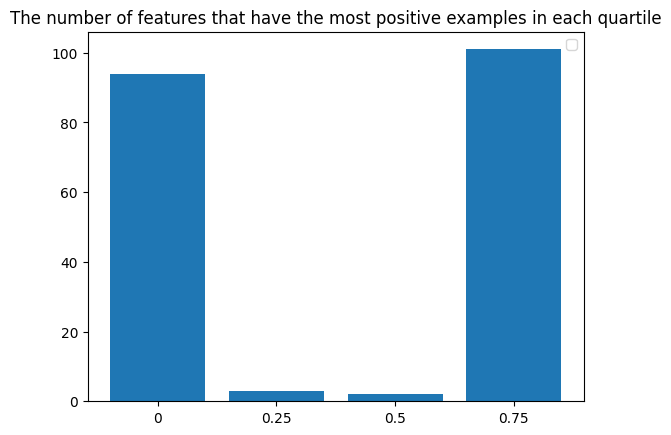

In [17]:
#by calculating median we can see that 1 and 4 quartiles are slightly more saturated with examples of the positive class
quart_df = pd.DataFrame(quartiles_df, index=features, columns=quartiles)
print(f'Median percentage of the positive class in each quartile:\n{quart_df.median()}')
quart_df.sample(10)

quart_max = quart_df.idxmax(axis=1).value_counts()

plt.bar(['0', '0.25', '0.5', '0.75'], quart_max.sort_index().values)
plt.title('The number of features that have the most positive examples in each quartile')
plt.legend()

In [18]:
# let's find features which contribute most to the impact
df_stack = pd.concat([quart_df.idxmax(axis=1), quart_df.max(axis=1)],
                     axis=1).rename({0:'Quartile_max', 1:'Percentage'}, axis=1)

sorted_df = df_stack.sort_values(by='Percentage', ascending=False)
sorted_df.head()

,Quartile_max,Percentage
var_81,0.00,14.348000
var_139,0.00,14.144000
var_110,0.75,13.426269
var_12,0.00,13.287847
var_146,0.00,13.154263


In [19]:
print(f'To sum it up')
for i, qua in enumerate(quartiles):
    print(f'There are {quart_max[qua]} features that have the highest positive target percentage in Quartile {i+1}')

print('Situation in Quartile 2 and 3 is atypical so those unusual features are: ')
print(quart_df[quart_df.idxmax(axis=1) == 0.25].index.values, 'in Quartile 2')
print(quart_df[quart_df.idxmax(axis=1) == 0.5].index.values, 'in Quartile 3')


To sum it up
There are 94 features that have the highest positive target percentage in Quartile 1
There are 3 features that have the highest positive target percentage in Quartile 2
There are 2 features that have the highest positive target percentage in Quartile 3
There are 101 features that have the highest positive target percentage in Quartile 4
Situation in Quartile 2 and 3 is atypical so those unusual features are: 
['var_30' 'var_100' 'var_101'] in Quartile 2
['var_17' 'var_185'] in Quartile 3


### Duplicate values

In [20]:
# features = train_df.iloc[:, 2:]
unique_max_train = []
unique_max_test = []
for feature in features:
    values = train_df[feature].value_counts()
    unique_max_train.append([feature, values.max(), values.idxmax()])
    values = test_df[feature].value_counts()
    unique_max_test.append([feature, values.max(), values.idxmax()])
    
    
np.transpose((pd.DataFrame(unique_max_train, columns=['Feature', 'Max duplicates', 'Value'])).\
            sort_values(by = 'Max duplicates', ascending=False).head(15))

,68,108,126,12,91,103,148,71,161,25,125,169,166,133,43
Feature,var_68,var_108,var_126,var_12,var_91,var_103,var_148,var_71,var_161,var_25,var_125,var_169,var_166,var_133,var_43
Max duplicates,1084,313,305,203,66,61,59,54,52,41,40,39,39,39,39
Value,5.0214,14.1999,11.5356,13.5545,6.9785,1.6662,4.0456,0.7031,5.7688,13.6723,12.5159,5.6941,2.7306,6.8632,11.5531


In [21]:
# Same for test data
np.transpose((pd.DataFrame(unique_max_test, columns=['Feature', 'Max duplicates', 'Value'])).\
            sort_values(by = 'Max duplicates', ascending=False).head(15))

,68,126,108,12,91,103,148,161,25,71,43,166,125,169,133
Feature,var_68,var_126,var_108,var_12,var_91,var_103,var_148,var_161,var_25,var_71,var_43,var_166,var_125,var_169,var_133
Max duplicates,1104,307,302,188,86,78,74,69,60,60,58,53,53,51,50
Value,5.0197,11.5357,14.1999,13.5546,6.9939,1.4659,4.0004,5.7114,13.5965,0.5389,11.5738,2.8446,12.2189,5.8455,6.6873


### Feature distributions

In [22]:
# n_rows = 50
# n_cols = 4
# fig, axs = plt.subplots(nrows=n_rows, ncols =n_cols, figsize=(24, n_rows*5))

# for i, feature in enumerate(features, 1):
#     plt.subplot(n_rows, n_cols, i)
#     sns.kdeplot(train_df[feature], bw_method='silverman', label='Training Set', fill=True)
#     sns.kdeplot(test_df[feature], bw_method='silverman', label='Training Set', fill=True)
    
#     plt.tick_params(axis='x', which='major', labelsize=8)
#     plt.tick_params(axis='y', which='major', labelsize=8)
#     plt.legend()
#     plt.title(f'Distribution of {feature} in Training and Test Set')

#### So we have imballanced dataset with very different class distributions.
#### Test data has a much smaller set of the unique values.
#### But, likely, we have 20k samples of the positive class and 170+k samples of the negative. This is more than enough for the model.